## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set()

iris = load_iris()
x = iris["data"]
y = iris["target"]
labels = iris["target_names"]

Creating training and test sets. I'm cheating a bit here by ensuring that the proportions of each type of flower are the same in the training and test sets; this is usually not the case in real-life classification problems.

In [2]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=50, random_state=42, stratify=y)

scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_te = scaler.transform(x_te)

## Dimensionality Reduction and Plotting

Now I will reduce the dimensionality of the feature space using PCA. I will use a scree plot to evaluate how much to reduce the dimensionality by.

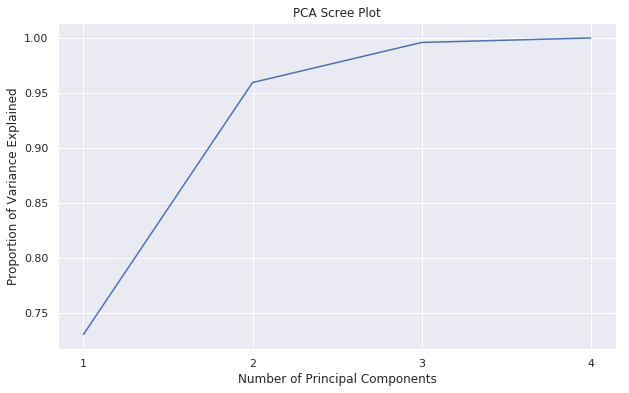

In [3]:
pca = PCA(n_components=4)
pca.fit(x_tr)
total_explained_variance = pca.explained_variance_ratio_.cumsum()

_, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 5), total_explained_variance)
ax.set(xlabel="Number of Principal Components",
       ylabel="Proportion of Variance Explained",
       title="PCA Scree Plot",
       xticks=[1, 2, 3, 4]);

From this plot, over 99% of the variation in the features is explained using just the first 2 principal components. Note that the definiton of "variance" here is a bit funny and is reated to but distinct from the usual definition in statistics.

In [4]:
pca2 = PCA(n_components=2)
pca2.fit(x_tr)
x_tr_pca = pca2.transform(x_tr)
x_te_pca = pca2.transform(x_te)

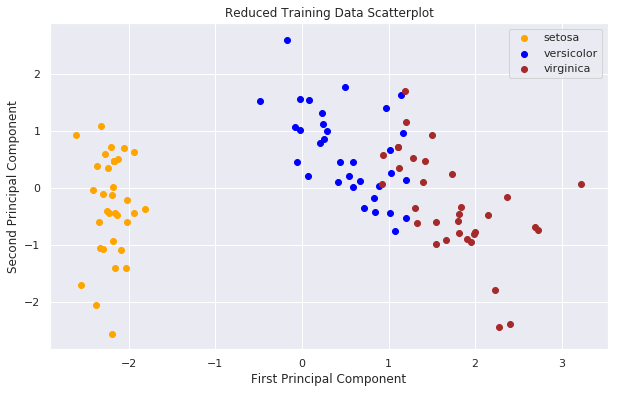

In [5]:
_, ax = plt.subplots(figsize=(10, 6))
for target, color in enumerate(["orange", "blue", "brown"]):
    ax.scatter(x_tr_pca[y_tr == target, 0],
               x_tr_pca[y_tr == target, 1],
               c=color, label=labels[target])
    
ax.legend()
ax.set(xlabel="First Principal Component",
       ylabel="Second Principal Component",
       title="Reduced Training Data Scatterplot");

## Model Fitting and Prediction

Here I will just train a simple logistic regression model (one-vs-rest to account for the multiple classes) and plot the resulting predictions.

In [6]:
model = LogisticRegression()
model.fit(x_tr_pca, y_tr);

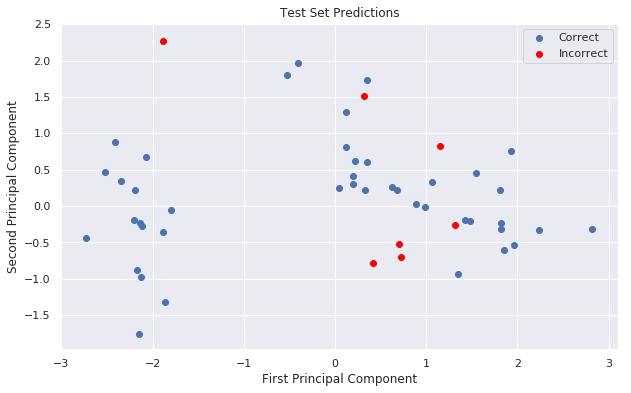

In [7]:
preds = model.predict(x_te_pca)
preds_correct = (preds == y_te)

_, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_te_pca[preds_correct, 0],
           x_te_pca[preds_correct, 1],
           label="Correct")
ax.scatter(x_te_pca[~preds_correct, 0],
           x_te_pca[~preds_correct, 1],
           color="red", label="Incorrect")
ax.legend()
ax.set(xlabel="First Principal Component",
       ylabel="Second Principal Component",
       title="Test Set Predictions");

It's also worth looking at the confusion matrix. We expect mix-ups between the versicolor and virginica classes; the setosa flowers are clearly set apart.

In [8]:
print(f"The class labels are, in order, {labels[0]}, {labels[1]}, and {labels[2]}.",
      end="\n\n")
print("Confusion matrix:\n", confusion_matrix(y_te, preds))

The class labels are, in order, setosa, versicolor, and virginica.

Confusion matrix:
 [[15  1  0]
 [ 0 13  4]
 [ 0  2 15]]


Indeed, most of the mix-ups occur between the versicolor and virginica classes, though there is one setosa example that is misclassified.